<center><b>Student: Ponmanikandan Velmurugan | Instructor : Mariam Salloum | TA : Haochen Zeng</b></center>

In this notebook I will be performing and taking you through the analysis I did with COVID-19 dataset provided by CDC

In [1]:
#Importing Headers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the Dataset using the API
df = pd.read_csv('https://data.cdc.gov/resource/n8mc-b4w4.csv?$limit=20000', sep=',', error_bad_lines = False) # read file as a dataframe
df.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,MN,27,DODGE,27039.0,18 to 49 years,NaN,NaN,NaN,-1.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,No,NaN
1,2020-11,MI,26,GLADWIN,26051.0,18 to 49 years,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Unknown,NaN
2,2021-04,VT,50,ORLEANS,50019.0,18 to 49 years,NaN,NaN,NaN,0.0,0.0,Multiple,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,NaN,Yes
3,2020-11,AL,1,LIMESTONE,1083.0,0 - 17 years,Female,Missing,Missing,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2021-01,NY,36,SCHOHARIE,36095.0,0 - 17 years,Female,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN


In [3]:
#Dataframe Specs
df.shape

(20000, 19)

In [4]:
#Counting Missing, Unknown and NaN values
def count_missing_values(dataframe, replace, value, columns) : 
    miss_column_array = []
    miss_ratio_array = []
    found_ratio_array = []
    for column in columns : 
        dataframe[column].replace(replace, value, inplace = True)
        miss_ratio = dataframe[column].isna().sum() / len(dataframe)
        if miss_ratio : 
            miss_column_array.append(column)
            miss_ratio_array.append(miss_ratio)
            found_ratio_array.append(1 - miss_ratio)
            print(column + " " + str(miss_ratio))    
    
    print("Number of Columns missing values : ", str(len(miss_column_array)))
    return [miss_ratio_array, found_ratio_array, miss_column_array]

In [5]:
#Counting Missing Values Function
miss_ratio_array, found_ratio_array, miss_column_array = count_missing_values(df, ['Unknown', 'Missing', 'NA'], np.NaN, df.columns)

res_county 0.0033
county_fips_code 0.0033
age_group 0.01085
sex 0.0484
race 0.60335
ethnicity 0.61845
case_positive_specimen 0.66965
case_onset_interval 0.52165
process 0.9497
exposure_yn 0.90525
symptom_status 0.5146
hosp_yn 0.5663
icu_yn 0.94005
death_yn 0.605
underlying_conditions_yn 0.93375
Number of Columns missing values :  15


From the above analysis we can conclude that around ***15 columns with missing values***. We can identify some columns having more than 90% missing values. Further extrapolating: 

In [6]:
#Plotting missing ratios
def Plot_Missing_Ratios(miss_ratio_array, found_ratio_array, miss_column_array, xlens, ylens) : 
    plotdata = pd.DataFrame({'Missing' : miss_ratio_array, 'Found' : found_ratio_array})
    ax = plotdata.plot(kind = 'bar',
                               grid = True,
                               legend = True,
                               figsize = (16, 5),
                               title = 'Missing vs Found Ratios')
    for i, v in enumerate(miss_ratio_array) :
        ax.text(i - xlens[0], v + ylens[1], str(round(v, 2))) #Rounding off can contradict previous numbers 
    for i, v in enumerate(found_ratio_array) :
        ax.text(i + xlens[1], v + ylens[1], str(round(v, 2))) #Rounding off can contradict previous numbers
    ax.set_xlabel('Features')
    ax.set_xticklabels(labels = miss_column_array)
    ax.set_ylabel('Ratios (%)')
    print()

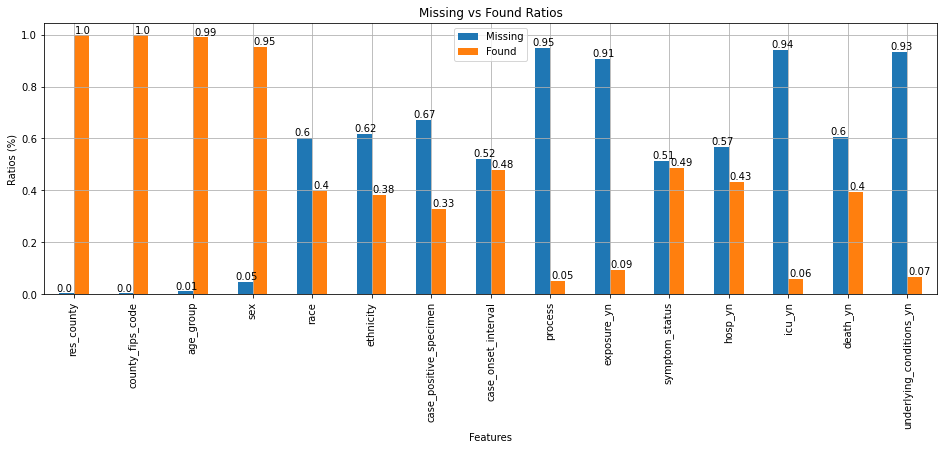

In [7]:
Plot_Missing_Ratios(miss_ratio_array, found_ratio_array, miss_column_array, [0.290, 0.020], [0.01, 0.01])

In [8]:
#Missing and Unknown values don't exist anymore --> converted to NaN
df.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,MN,27,DODGE,27039.0,18 to 49 years,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,Laboratory-confirmed case,Symptomatic,NaN,NaN,No,NaN
1,2020-11,MI,26,GLADWIN,26051.0,18 to 49 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratory-confirmed case,NaN,NaN,NaN,NaN,NaN
2,2021-04,VT,50,ORLEANS,50019.0,18 to 49 years,NaN,NaN,NaN,0.0,0.0,Multiple,Yes,Laboratory-confirmed case,Symptomatic,No,NaN,NaN,Yes
3,2020-11,AL,1,LIMESTONE,1083.0,0 - 17 years,Female,NaN,NaN,NaN,NaN,NaN,NaN,Laboratory-confirmed case,NaN,NaN,NaN,NaN,NaN
4,2021-01,NY,36,SCHOHARIE,36095.0,0 - 17 years,Female,NaN,NaN,0.0,NaN,NaN,NaN,Laboratory-confirmed case,NaN,NaN,NaN,No,NaN


***--------------------------------------------------------------------------------End of Section----------------------------------------------------------------------------------------***

**Stage 1 Cleaning : (Few missing values)**

1. The Resident County and County FIPS Code have very few missing values and cannot be inferred from other features so replacing NaN with Missing
2. The Age group and Sex also have few missing and cannot be predicted without any complex models so replacing NaN with Missing

In [9]:
#Performing Stage 1
stage_1_columns = ['res_county', 'county_fips_code', 'age_group', 'sex']
count_missing_values(df, np.NaN, 'Missing', columns = stage_1_columns)    
miss_ratio_array, found_ratio_array, miss_column_array = count_missing_values(df, np.NaN, np.NaN, df.columns)

Number of Columns missing values :  0
race 0.60335
ethnicity 0.61845
case_positive_specimen 0.66965
case_onset_interval 0.52165
process 0.9497
exposure_yn 0.90525
symptom_status 0.5146
hosp_yn 0.5663
icu_yn 0.94005
death_yn 0.605
underlying_conditions_yn 0.93375
Number of Columns missing values :  11


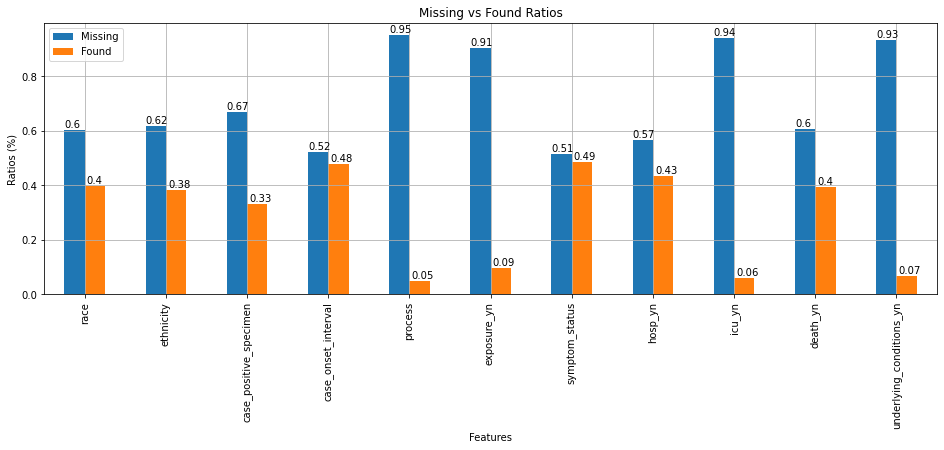

In [10]:
#Plotting Stage 1 
Plot_Missing_Ratios(miss_ratio_array, found_ratio_array, miss_column_array, [0.25, 0.025], [0.01, 0.01])

**Stage 2 Cleaning : (Medium missing values)**

1. The Race and Ethnicity cannot be inferred from other features so replacing NaN with Missing
2. The case_positive_specimen (weeks) and case_onset_interval (weeks) cannot be predicted without any complex models and Case_Onset_Interval and Symptom_status are related because only if someone have a symptom, they can have weeks before symptom onset. So, Overall removing these two columns
3. The Symptom Onset, Hopsitalized status and Death status provides us with vital information so replacing NaN with Missing

In [11]:
#Performing Stage 2
stage_2_columns = ['race', 'ethnicity', 'symptom_status', 'hosp_yn', 'death_yn']
count_missing_values(df, np.NaN, 'Missing', columns = stage_2_columns)    
df.drop(['case_positive_specimen', 'case_onset_interval'], axis = 1, inplace = True)
miss_ratio_array, found_ratio_array, miss_column_array = count_missing_values(df, np.NaN, np.NaN, df.columns)

Number of Columns missing values :  0
process 0.9497
exposure_yn 0.90525
icu_yn 0.94005
underlying_conditions_yn 0.93375
Number of Columns missing values :  4


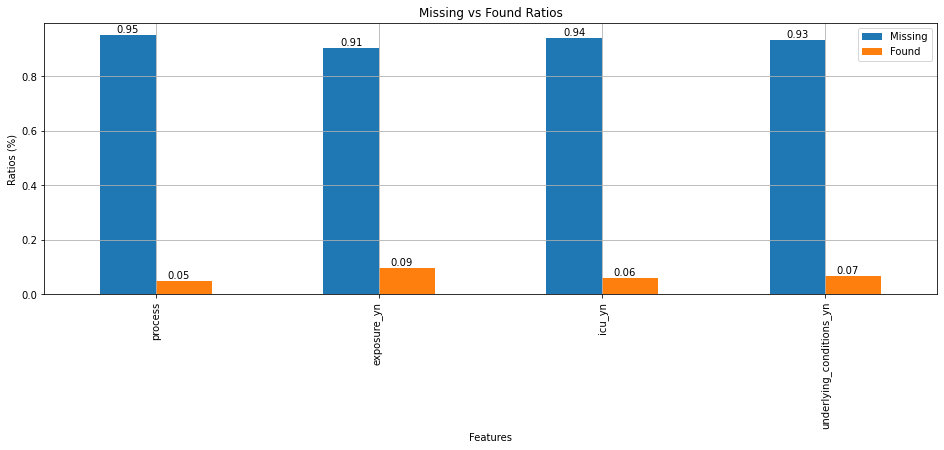

In [12]:
#Plotting Stage 2
Plot_Missing_Ratios(miss_ratio_array, found_ratio_array, miss_column_array, [0.175, 0.05], [0.01, 0.01])

**Stage 3 Cleaning : (High missing values)**

1. The Process, ICU Status and Underlying Conditions cannot be predicted with other features. (It can be a case that patients having underlying conditions are admitted in ICU because they can be severe. But since both are having around 94% missing so drop them)
2. The Exposure feature can be inferred from current_status and symptom_status. If the patient is symptomatic or is a lab confirmed case then we can conclude they have been exposed. We cannot prove the contrary for sure so we can just fill them up with Missing

In [13]:
#Performing Stage 3
temp_df = df['exposure_yn'].copy(deep = True)
for index in df['exposure_yn'].index.tolist() : 
    if df.iloc[index]['current_status'] == 'Laboratory-confirmed case' or df.iloc[index]['symptom_status'] == 'Symptomatic' : 
        temp_df[index] = 'Yes'
        
df['exposure_yn'] = temp_df

stage_3_columns = ['exposure_yn']
count_missing_values(df, np.NaN, 'Missing', columns = stage_3_columns)    
df.drop(['process', 'icu_yn', 'underlying_conditions_yn'], axis = 1, inplace = True)
miss_ratio_array, found_ratio_array, miss_column_array = count_missing_values(df, np.NaN, np.NaN, df.columns)

Number of Columns missing values :  0
Number of Columns missing values :  0


***--------------------------------------------------------------------------------End of Section----------------------------------------------------------------------------------------***

We have identified and taken care of all the missing values. Now for the analysis part: 

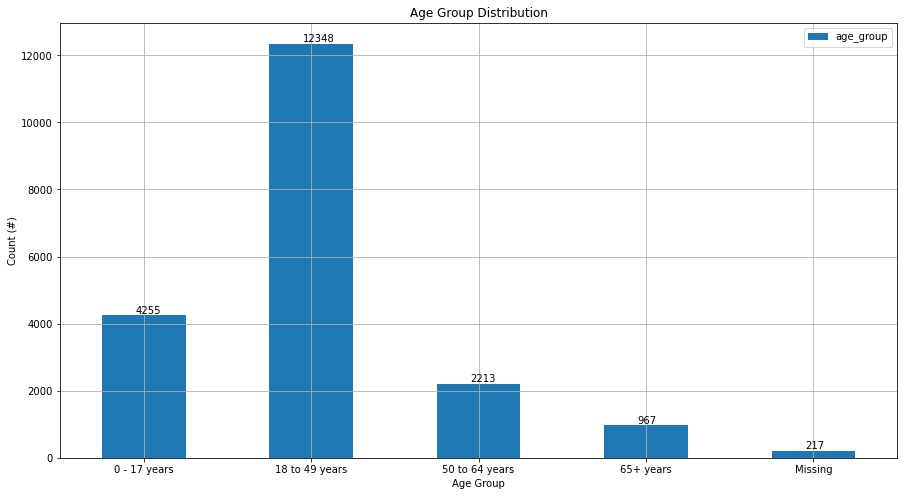

In [14]:
#Visualize number of cases per Age Group
ax = df['age_group'].value_counts().sort_index().plot(kind = 'bar',
                                                 grid = True,
                                                 legend = True,
                                                 figsize = (15, 8),
                                                 title = 'Age Group Distribution')
for i, v in enumerate(df['age_group'].value_counts().sort_index().values.tolist()) :
    ax.text(i - 0.05, v + 50, str(round(v, 1)))
ax.set_xlabel('Age Group')
ax.set_ylabel('Count (#)')
ax.set_xticklabels(labels = df['age_group'].value_counts().sort_index().index.tolist(), rotation = 360)
print()

From the above graph we can infer that the dataset has ***Age group 18 to 49 years as the dominant population***. However, the ratio of positive and negative cases can be identified on further analysis.

***--------------------------------------------------------------------------------End of Section----------------------------------------------------------------------------------------***

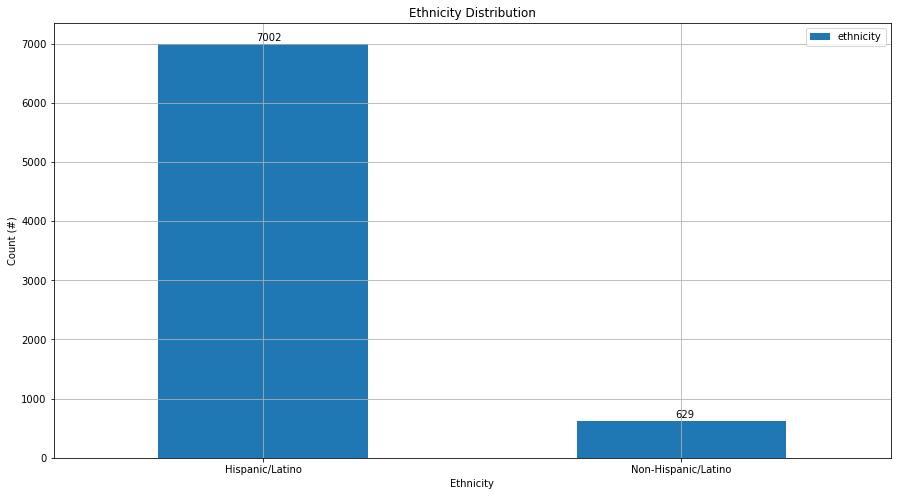

In [15]:
#Visualize the number of cases across ethnicity
target_df = df[df['ethnicity'] != 'Missing']['ethnicity'].value_counts().sort_index()
ax = target_df.plot(kind = 'bar',
                    grid = True,
                    legend = True,
                    figsize = (15, 8),
                    title = 'Ethnicity Distribution')
for i, v in enumerate(target_df.values.tolist()) :
    ax.text(i - 0.0150, v + 50, str(round(v, 1)))
ax.set_xlabel('Ethnicity')
ax.set_ylabel('Count (#)')
ax.set_xticklabels(labels = target_df.index.tolist(), rotation = 360)
print()

From the above graph we can infer that the dataset has ***Hispanic/Latino as the dominant population***. However, the ratio of positive and negative cases can be identified on further analysis. **Note:** We ignored the Missing values.

***--------------------------------------------------------------------------------End of Section----------------------------------------------------------------------------------------***

In [16]:
#Visualizing Positive Cases
def Positive_Case_Plot(dataframe, target, label, axis, xlen, ylen, figsize = (15, 8)) : 
    target_df = dataframe[(dataframe[target] != 'Missing') & (dataframe['current_status'] == 'Laboratory-confirmed case') & (dataframe['symptom_status'] == 'Symptomatic')][target].value_counts().sort_index()
    target_df = (target_df / target_df.values.sum()) * 100
    ax = target_df.plot(kind = 'bar',
                        ax = axis,
                        grid = True,
                        legend = True,
                        figsize = figsize,
                        title = label + ' based COVID Positive Cases with Symptoms Distribution')
    for i, v in enumerate(target_df.values.tolist()) :
        ax.text(i - xlen, v + ylen, str(round(v, 1)))
    ax.set_xlabel(label)
    ax.set_ylabel('Positive Cases (%)')
    ax.set_xticklabels(labels = target_df.index.tolist(), rotation = 360)
    #print()

In [17]:
#Singlular Analysis
#Positive Cases vs Age Group
#Positive_Case_Plot(df, 'age_group', 'Age Group', axis = None, xlen = 0.05, ylen = 0.5)
#Positive Cases vs Ethnicity
#Positive_Case_Plot(df, 'ethnicity', 'Ethnicity', axis = None, xlen = 0.0250, ylen = 0.5)
#Positive Cases vs Gender
#Positive_Case_Plot(df, 'sex', 'Gender', axis = None, xlen = 0.0250, ylen = 0.5)

In [18]:
#Plotting function for analysis based on features
def Positive_Case_Multiple_Plot(dataframe, target_columns, target_names, xlens, ylens, figsize = (30, 60)) : 
    num_plots = 0
    figure, axis = plt.subplots(4, 2)
    plt.subplots_adjust(hspace = 0.2, wspace= 0.2)

    for i in range(4) :
        for j in range (2) :
            if num_plots < len(target_columns) : 
                ax = Positive_Case_Plot(dataframe, target_columns[num_plots], target_names[num_plots], axis[i, j], xlens[num_plots], ylens[num_plots], figsize)
                num_plots += 1

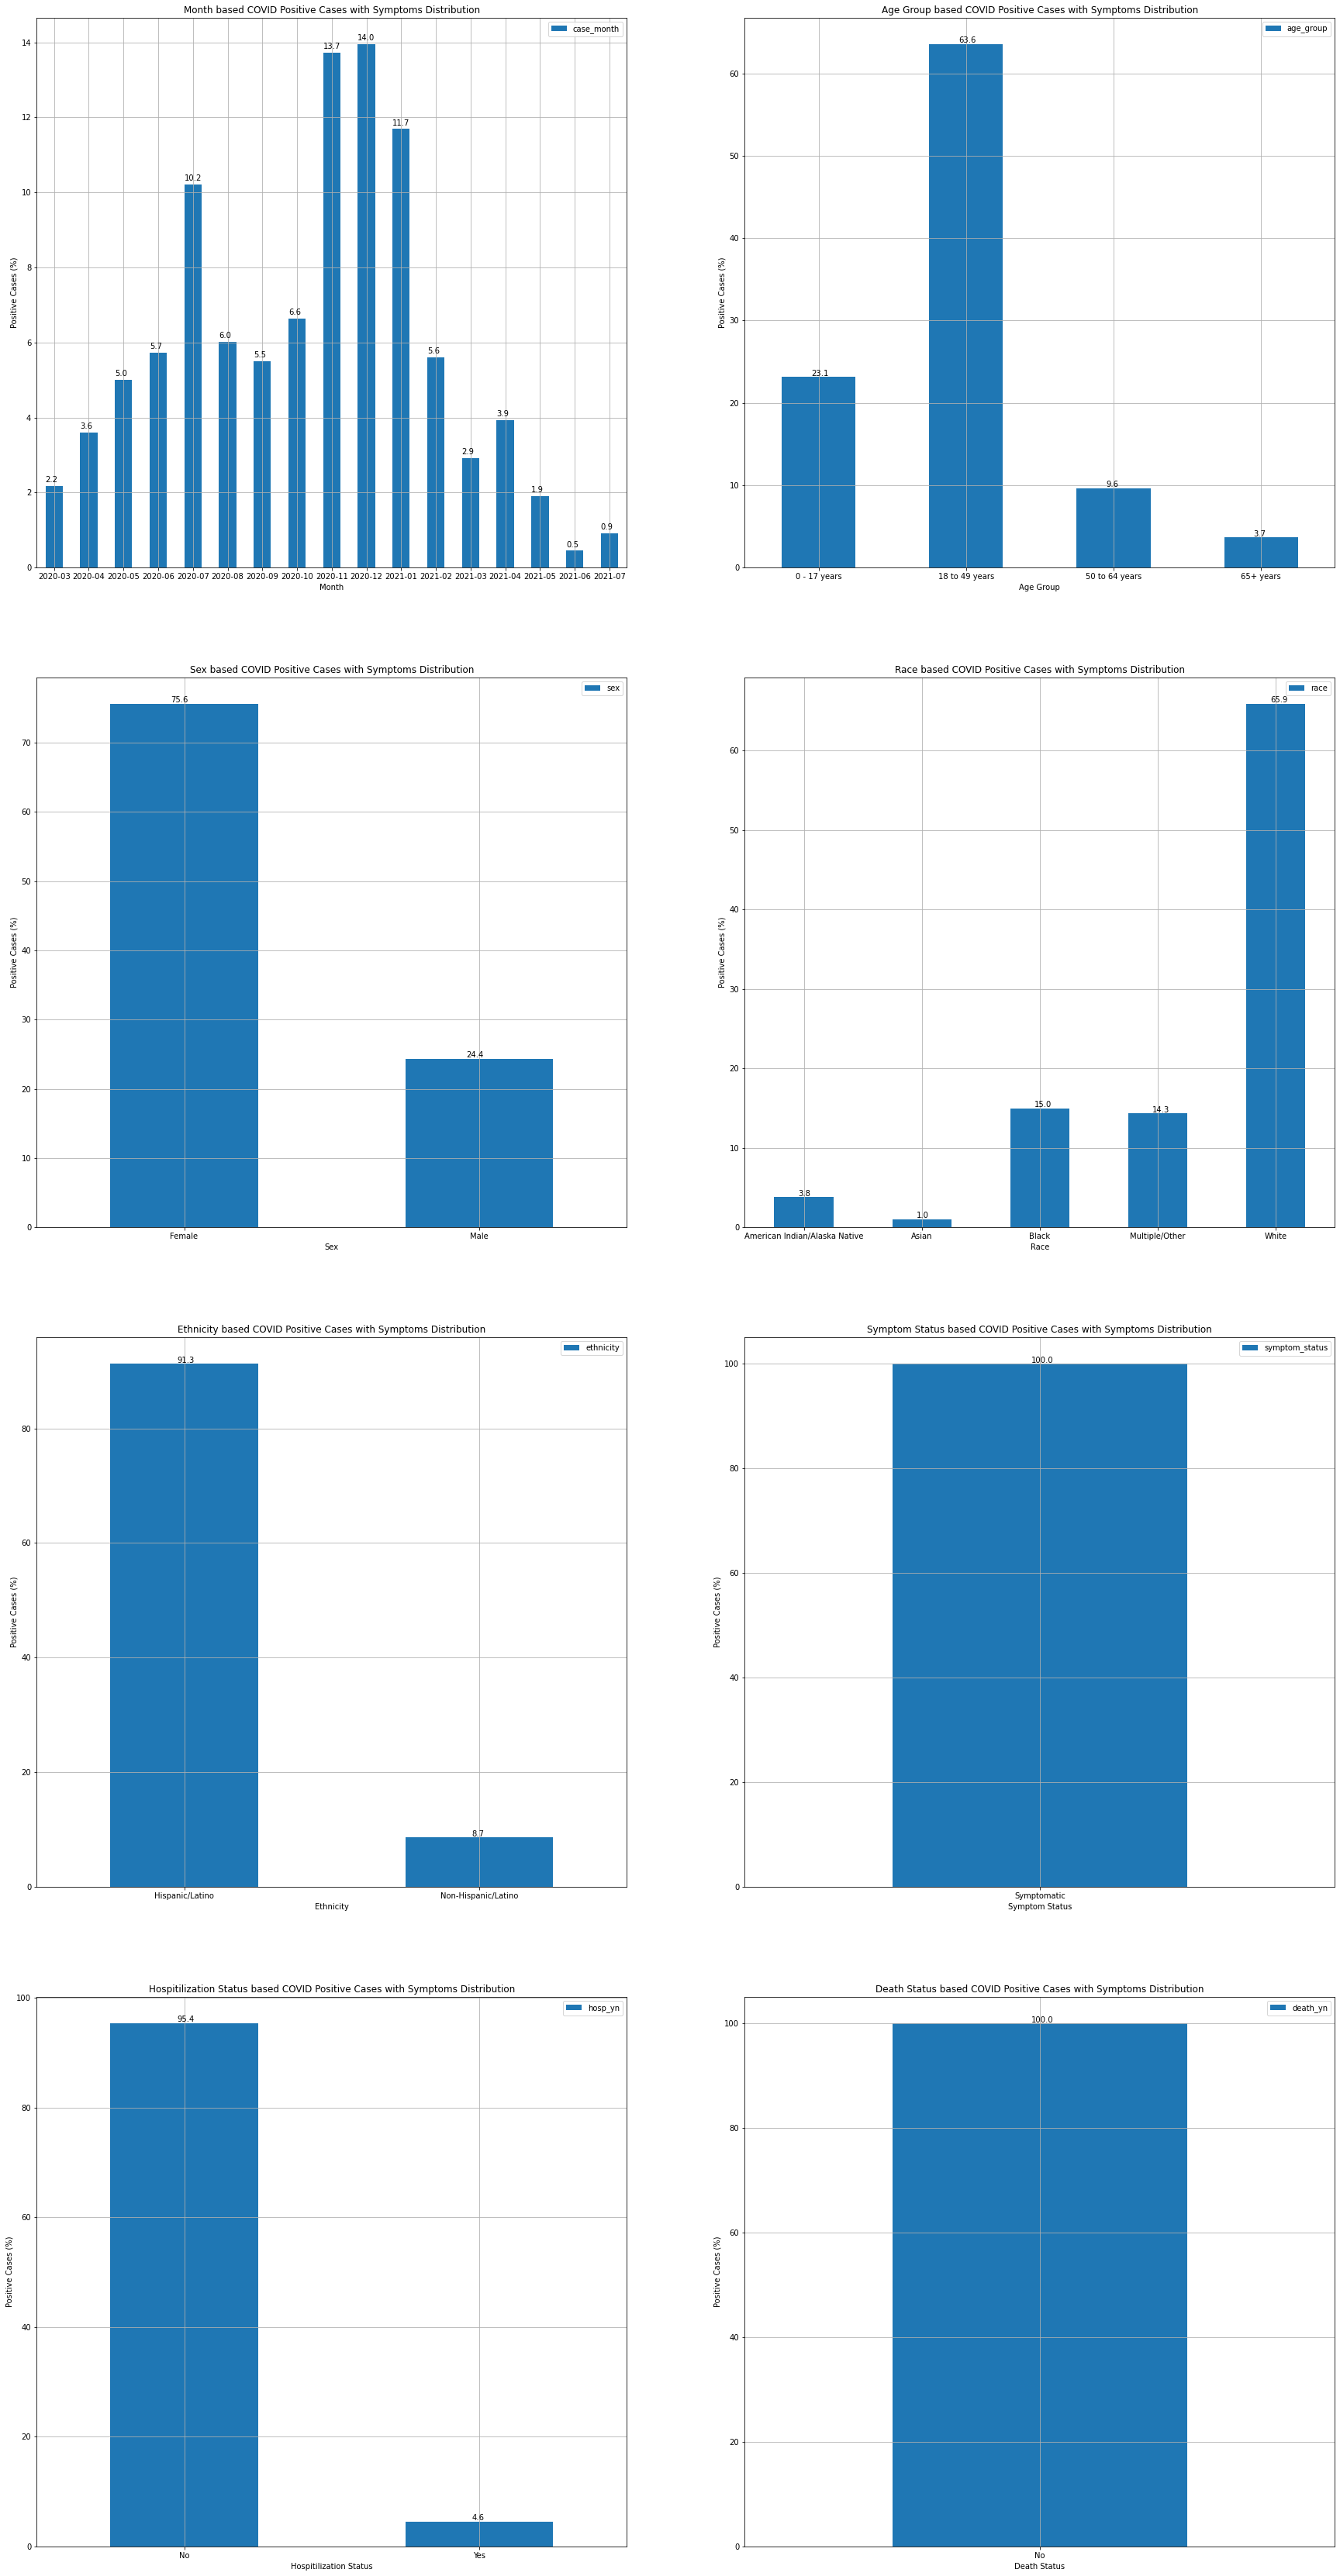

In [19]:
#Plotting the distribution across features
target_columns = ['case_month', 'age_group', 'sex', 'race', 'ethnicity', 'symptom_status', 'hosp_yn', 'death_yn']
target_names = ['Month', 'Age Group', 'Sex', 'Race', 'Ethnicity', 'Symptom Status', 'Hospitilization Status', 'Death Status']
xlens = [0.25, 0.05, 0.045, 0.045, 0.025, 0.015, 0.025, 0.015]
ylens = [0.1, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15]
Positive_Case_Multiple_Plot(df, target_columns, target_names, xlens, ylens)

### Analysis: 
1. I can infer that **peak positive cases** has been reported during the **November 2020 - January 2021 period.**
2. I can infer that **age group 18 - 49** has been the **most affected** according to the dataset.
3. I can infer that **Females** are **affected more** than Males according to the dataset.
4. I can infer that **White people** have been **affected the most** during the pandemic according to the dataset.
5. I can infer that **Hispanic/Latinos** has been **affected the most** during the pandemic according to the dataset.
6. I can infer that **very few** people have been **hospitalized** according to the dataset.
7. I can infer that there are **no death cases** reported according to the dataset.

**Note:** All Missing values are ignored for analysis

***--------------------------------------------------------------------------------End of Section----------------------------------------------------------------------------------------***

In [20]:
#Gathering Riverside Data
riverside_df = pd.read_csv('https://data.cdc.gov/resource/n8mc-b4w4.csv?res_county=RIVERSIDE&$limit=20000', sep=',', error_bad_lines = False)
riverside_df.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-08,CA,6,RIVERSIDE,6065,0 - 17 years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,No,NaN
1,2020-08,CA,6,RIVERSIDE,6065,0 - 17 years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
2,2020-08,CA,6,RIVERSIDE,6065,0 - 17 years,Female,White,Non-Hispanic/Latino,NaN,1.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
3,2020-08,CA,6,RIVERSIDE,6065,0 - 17 years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
4,2020-08,CA,6,RIVERSIDE,6065,0 - 17 years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,No,NaN


In [21]:
riverside_df.shape

(20000, 19)

In [22]:
#Counting Missing Values Function
miss_ratio_array, found_ratio_array, miss_column_array = count_missing_values(riverside_df, ['Unknown', 'Missing', 'NA'], np.NaN, riverside_df.columns)

age_group 0.001
sex 0.00125
race 0.56605
ethnicity 0.48285
case_positive_specimen 1.0
case_onset_interval 0.70835
process 1.0
exposure_yn 1.0
symptom_status 0.58575
hosp_yn 0.62985
icu_yn 0.9885
death_yn 0.0021
underlying_conditions_yn 0.99815
Number of Columns missing values :  13


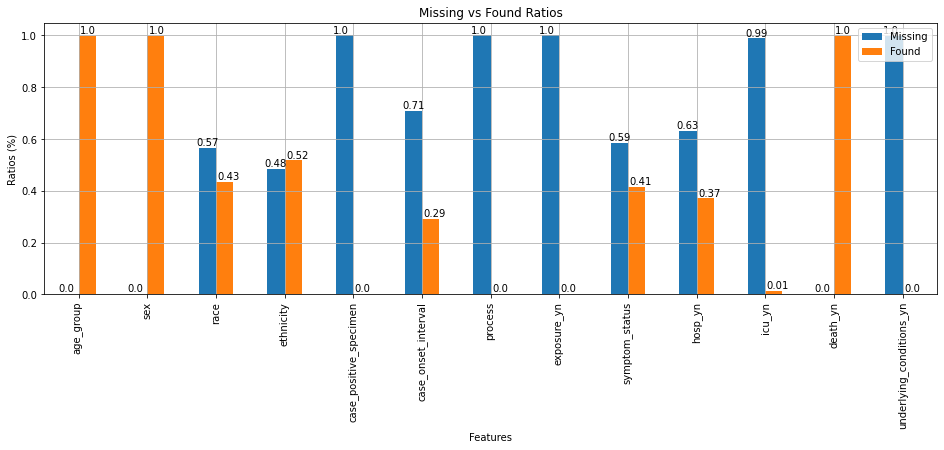

In [23]:
Plot_Missing_Ratios(miss_ratio_array, found_ratio_array, miss_column_array, [0.290, 0.020], [0.01, 0.01])

In [24]:
#Performing Stage 1
stage_1_columns = ['age_group', 'sex', 'death_yn']
count_missing_values(riverside_df, np.NaN, 'Missing', columns = stage_1_columns)    
miss_ratio_array, found_ratio_array, miss_column_array = count_missing_values(riverside_df, np.NaN, np.NaN, riverside_df.columns)

Number of Columns missing values :  0
race 0.56605
ethnicity 0.48285
case_positive_specimen 1.0
case_onset_interval 0.70835
process 1.0
exposure_yn 1.0
symptom_status 0.58575
hosp_yn 0.62985
icu_yn 0.9885
underlying_conditions_yn 0.99815
Number of Columns missing values :  10


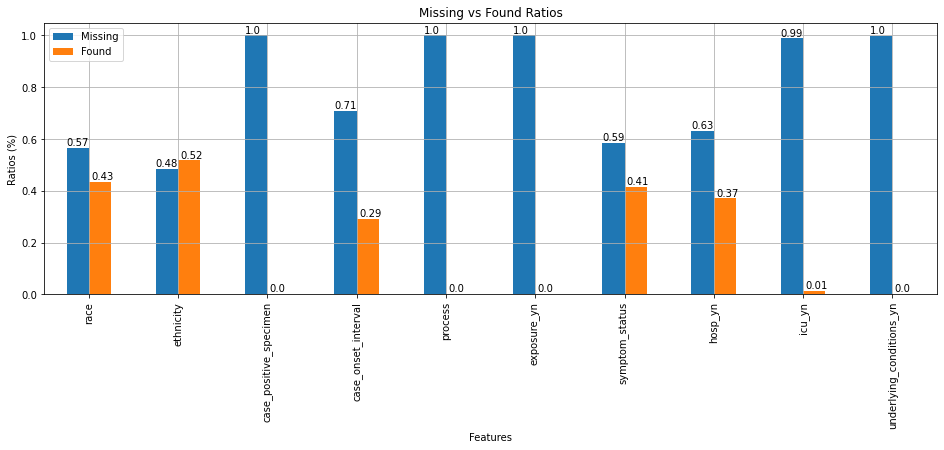

In [25]:
#Plotting Stage 1 
Plot_Missing_Ratios(miss_ratio_array, found_ratio_array, miss_column_array, [0.25, 0.025], [0.01, 0.01])

In [26]:
#Performing Stage 2
stage_2_columns = ['race', 'ethnicity', 'symptom_status', 'hosp_yn']
count_missing_values(riverside_df, np.NaN, 'Missing', columns = stage_2_columns)    
riverside_df.drop(['case_positive_specimen', 'case_onset_interval'], axis = 1, inplace = True)
miss_ratio_array, found_ratio_array, miss_column_array = count_missing_values(riverside_df, np.NaN, np.NaN, riverside_df.columns)

Number of Columns missing values :  0
process 1.0
exposure_yn 1.0
icu_yn 0.9885
underlying_conditions_yn 0.99815
Number of Columns missing values :  4


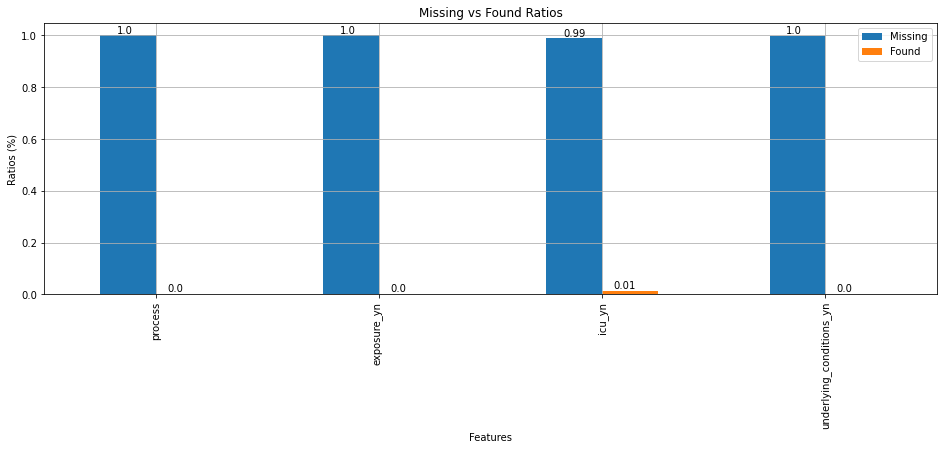

In [27]:
#Plotting Stage 2
Plot_Missing_Ratios(miss_ratio_array, found_ratio_array, miss_column_array, [0.175, 0.05], [0.01, 0.01])

In [28]:
#Performing Stage 3
temp_df = riverside_df['exposure_yn'].copy(deep = True)
for index in riverside_df['exposure_yn'].index.tolist() : 
    if riverside_df.iloc[index]['current_status'] == 'Laboratory-confirmed case' or riverside_df.iloc[index]['symptom_status'] == 'Symptomatic' : 
        temp_df[index] = 'Yes'
        
riverside_df['exposure_yn'] = temp_df

stage_3_columns = ['exposure_yn']
count_missing_values(riverside_df, np.NaN, 'Missing', columns = stage_3_columns)    
riverside_df.drop(['process', 'icu_yn', 'underlying_conditions_yn'], axis = 1, inplace = True)
miss_ratio_array, found_ratio_array, miss_column_array = count_missing_values(riverside_df, np.NaN, np.NaN, riverside_df.columns)

Number of Columns missing values :  0
Number of Columns missing values :  0


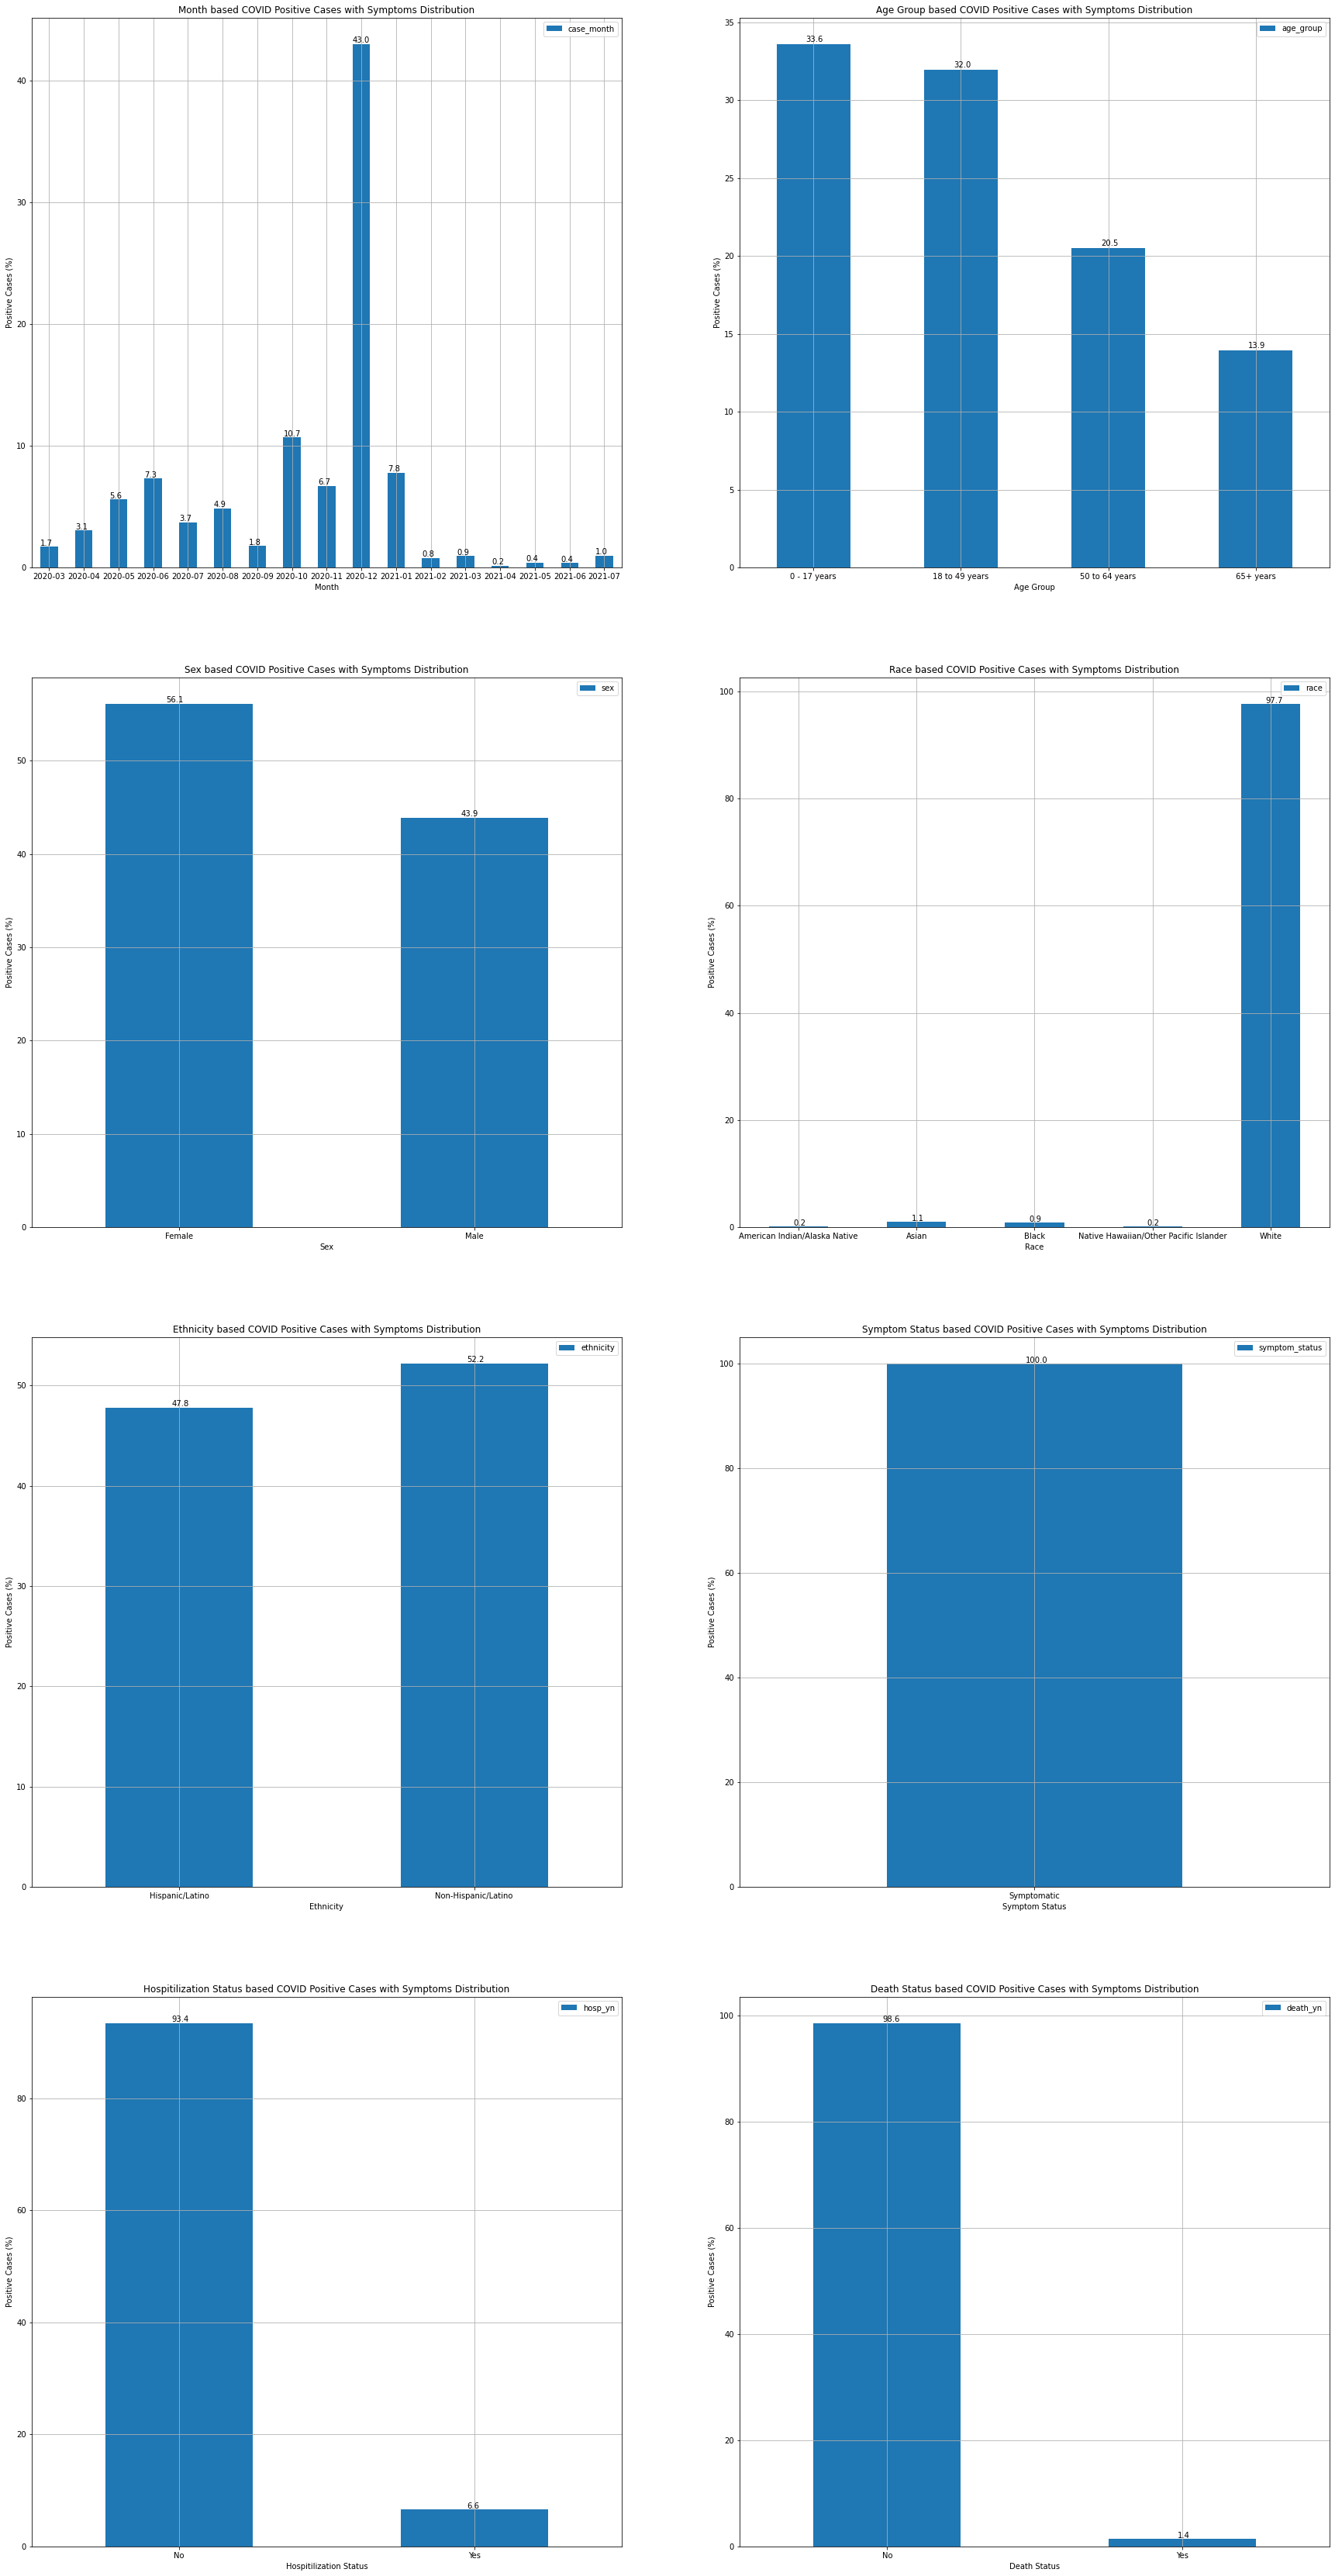

In [29]:
#Plotting the distribution across features
target_columns = ['case_month', 'age_group', 'sex', 'race', 'ethnicity', 'symptom_status', 'hosp_yn', 'death_yn']
target_names = ['Month', 'Age Group', 'Sex', 'Race', 'Ethnicity', 'Symptom Status', 'Hospitilization Status', 'Death Status']
xlens = [0.25, 0.05, 0.045, 0.045, 0.025, 0.015, 0.025, 0.015]
ylens = [0.1, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15]
Positive_Case_Multiple_Plot(riverside_df, target_columns, target_names, xlens, ylens)

### Analysis: 
1. I can infer that **peak positive cases** has been reported during **December 2020** in Riverside.
2. I can infer that **age groups 0 - 17 and 18 - 49** have been the **most affected** during the pandemic in Riverside according to the dataset.
3. I can infer that **Females** and **Males** are **affected almost the same** during the pandemic in Riverside according to the dataset.
4. I can infer that **White people** have been **affected the most** during the pandemic in Riverside according to the dataset.
5. I can infer that **Hispanic/Latinos** and **Non-Hispanic/Latino** has been **affected almost the same** during the pandemic in Riverside according to the dataset.
6. I can infer that **very few** people have been **hospitalized** in Riverside according to the dataset.
7. I can infer that there are **very few death cases** in Riverside reported according to the dataset.

**Note:** All Missing values are ignored for analysis

***--------------------------------------------------------------------------------End of Section----------------------------------------------------------------------------------------***